# EDA данных

In [1]:
import pandas as pd
import numpy as np
import pyarrow.feather as ft
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

warnings.simplefilter('ignore')

## Загрузим данные

In [2]:
df_test = ft.read_feather('project_data_imv_auto/project_test_public.f')
df_test.head(3)

,sale_end_date,brand,model,generation,modification,equipment,body_type,drive_type,transmission_type,engine_type,...,electroprivod_mult,fary_mult,multimedia_navigacia_mult,obogrev_mult,pamyat_nastroek_mult,podushki_bezopasnosti_mult,pomosh_pri_vozhdenii_mult,protivoygonnaya_sistema_mult,salon_mult,upravlenie_klimatom_mult
0,2023-02-25,Volkswagen,Passat,B8 (2014—2020),2.0 TDI DSG (150 л.с.),None,Седан,Передний,Робот,Дизель,...,"[13729,13731,13733]",None,"[13768,13769,13770,13771,13772]","[13721,13722,13723,13725]",None,"[13751,13754,13755]","[13739,13740,13741,13742,13744,13745,13746]","[13747,13748,13749]",[13719],None
1,2023-02-19,Volkswagen,Passat,B8 (2014—2020),2.0 TDI DSG (150 л.с.),None,Седан,Передний,Робот,Дизель,...,"[13729,13731]","[13783,13784]","[13765,13767,13768,13769,13771]","[13721,13723,13724,13725]",None,"[13751,13753,13754]","[13739,13740,13741,13742,13745,13746]","[13747,13748,13749]",[13719],None
2,2023-02-18,Volkswagen,Passat,B8 (2014—2020),2.0 TDI DSG (150 л.с.),None,Универсал,Передний,Робот,Дизель,...,None,None,None,None,None,None,None,None,None,None


In [3]:
df_train = ft.read_feather('project_data_imv_auto/project_train.f')
df_train.head(3)

,actual_price,price,start_date,close_date,sale_end_date,brand,model,generation,modification,equipment,...,electroprivod_mult,fary_mult,multimedia_navigacia_mult,obogrev_mult,pamyat_nastroek_mult,podushki_bezopasnosti_mult,pomosh_pri_vozhdenii_mult,protivoygonnaya_sistema_mult,salon_mult,upravlenie_klimatom_mult
0,NaN,1950000.000000000000000,2023-02-18 13:37:49.603445,2023-02-19 15:06:28.603039,NaT,Volkswagen,Passat,B8 (2014—2020),2.0 TDI DSG (150 л.с.),Highline,...,[13729],"[13783,13784]","[13763,13764,13765,13766,13767,13768,13769,137...","[13721,13722,13723,13724]",None,"[13751,13752,13753,13754,13755]","[13739,13740,13741,13742,13744,13745,13746]","[13747,13748,13749]",[13719],[13713]
1,NaN,1999000.000000000000000,2023-02-11 19:49:43.158681,2023-02-24 11:04:43.685727,NaT,Volkswagen,Passat,B8 (2014—2020),2.0 TDI DSG (150 л.с.),Highline,...,"[13729,13733]","[13783,13784,13785]","[13763,13764,13765,13767,13768,13769,13770,137...","[13721,13723,13724]",None,"[13751,13753,13754,13755]","[13739,13740,13741,13742,13744,13745,13746]","[13748,13749]",[13719],"[13712,13713]"
2,NaN,1780000.000000000000000,2023-02-04 14:39:08.813905,2023-02-24 20:48:25.210683,NaT,Volkswagen,Passat,B8 (2014—2020),2.0 TDI DSG (150 л.с.),None,...,"[13729,13731,13733]",[13783],"[13768,13772]",None,None,"[13751,13752,13753,13754]","[13740,13741,13742,13744,13745,13746]",[13749],None,None


In [4]:
df_train.columns

Index(['actual_price', 'price', 'start_date', 'close_date', 'sale_end_date',
       'brand', 'model', 'generation', 'modification', 'equipment',
       'body_type', 'drive_type', 'transmission_type', 'engine_type',
       'doors_number', 'color', 'pts', 'year', 'mileage', 'owners_count',
       'steering_wheel', 'latitude', 'longitude', 'crashes', 'is_taxi',
       'is_pledged', 'is_restrictions', 'is_carsharing', 'description',
       'Передняя левая фара', 'Передняя правая фара', 'Правое зеркало',
       'Левое зеркало', 'Капот', 'Заднее правое крыло', 'Заднее левое крыло',
       'Передняя левая дверь', 'Крыша', 'Переднее правое крыло',
       'Заднее стекло', 'Задний бампер', 'Передняя правая дверь',
       'Задняя правая фара', 'Дверь багажника', 'Переднее левое крыло',
       'Лобовое стекло', 'Задняя правая дверь', 'Передний бампер',
       'Задняя левая фара', 'Задняя левая дверь', 'audiosistema', 'diski',
       'electropodemniki', 'fary', 'salon', 'upravlenie_klimatom',
     

In [5]:
df_test.columns

Index(['sale_end_date', 'brand', 'model', 'generation', 'modification',
       'equipment', 'body_type', 'drive_type', 'transmission_type',
       'engine_type', 'doors_number', 'color', 'pts', 'year', 'mileage',
       'owners_count', 'steering_wheel', 'latitude', 'longitude', 'crashes',
       'is_taxi', 'is_pledged', 'is_restrictions', 'is_carsharing',
       'description', 'Передняя левая фара', 'Передняя правая фара',
       'Правое зеркало', 'Левое зеркало', 'Капот', 'Заднее правое крыло',
       'Заднее левое крыло', 'Передняя левая дверь', 'Крыша',
       'Переднее правое крыло', 'Заднее стекло', 'Задний бампер',
       'Передняя правая дверь', 'Задняя правая фара', 'Дверь багажника',
       'Переднее левое крыло', 'Лобовое стекло', 'Задняя правая дверь',
       'Передний бампер', 'Задняя левая фара', 'Задняя левая дверь',
       'audiosistema', 'diski', 'electropodemniki', 'fary', 'salon',
       'upravlenie_klimatom', 'usilitel_rul', 'aktivnaya_bezopasnost_mult',
       'audi

In [6]:
# тест и трейн по составу колонок отличаются следующим образом:
set(df_train.columns).difference(set(df_test.columns))

{'actual_price', 'close_date', 'price', 'start_date'}

In [7]:
options = pd.read_csv('project_data_imv_auto/option_names.csv')
options.head(3)

,id,viewItemLabel
0,13705,Гидравлический
1,13706,Электрогидравлический
2,13707,Электрический


In [8]:
df_train['price'] = df_train['price'].astype(float)

### Generation

In [9]:
df_train['generation'].describe()

count                      1424484
unique                        1183
top       I рестайлинг (2003—2010)
freq                         17318
Name: generation, dtype: object

In [10]:
df_train['generation'].unique()

array(['B8 (2014—2020)', 'I рестайлинг (2020—2023)',
       'W164 рестайлинг (2008—2011)', ..., 'X253 рестайлинг (2019—2023)',
       'W11 (1998—2005)', 'M10 (1995—2001)'], dtype=object)

In [11]:
df_train['generation'].str.split().apply(len).value_counts()

2    964422
3    427204
4     32858
Name: generation, dtype: int64

В основном колонка заполнена данными вида "кодировка поколения" + "годы", но в трети объявлений так же содержится информация о рестайлинге и поколении рестайлинга:

In [12]:
df_train[df_train['generation'].str.split().apply(len) == 4]['generation'].unique()

array(['J200 рестайлинг 2 (2015—2023)', '200 рестайлинг 2 (2015—2023)',
       'III рестайлинг 3 (2018—2023)', '150 рестайлинг 2 (2017—2023)',
       'GJ рестайлинг 2 (2018—2023)', 'I рестайлинг 2 (2014—2016)',
       'II рестайлинг 2 (2013—2016)', 'II рестайлинг 2 (2012—2014)',
       'Z51 рестайлинг 2 (2011—2015)',
       'GD/GC/GG рестайлинг 2 (2005—2007)', 'I рестайлинг 2 (2006—2008)',
       'II рестайлинг 2 (2012—2015)', '100 рестайлинг 2 (2005—2007)',
       'III рестайлинг 2 (2015—2018)', 'I рестайлинг 2 (2013—2016)',
       'III рестайлинг 2 (2012—2018)', 'F20/F21 рестайлинг 2 (2017—2019)',
       'V рестайлинг 2 (2017—2019)', 'I рестайлинг 3 (2016—2023)',
       'I рестайлинг 2 (2016—2023)', '8P рестайлинг 2 (2008—2013)',
       'GD рестайлинг 2 (2005—2007)', 'I рестайлинг 2 (2008—2010)',
       'I рестайлинг 2 (2003—2010)', 'II рестайлинг 2 (2018—2023)',
       'D рестайлинг 2 (2011—2014)', 'II рестайлинг 2 (2003—2013)',
       'W463 рестайлинг 2 (2012—2015)', 'III рестайлин

Попробуем разнести информацию по разным колонкам и посмотрим на их связь с таргетом.

In [13]:
# Оставим в колонке generation только кодировку поколения.
# Информацию о рестайлинге вынесем в колонку restyling. При этом поколение без рестайлинга будем кодировать как 0, 
# рестайлинг первого поколения как 1, второго поколения рестайлинга как 2 и тд.
# Наконец вынесем годы в колонку generation_years
def restyling_extract(gen_list: list) -> int:
    """
    Выделяем поколение рестайлинга из списка слов колонки generation
    """
    if len(gen_list) == 4:
        return int(gen_list[-2])
    elif len(gen_list) == 3:
        return 1
    return 0

generation = df_train['generation'].str.split()
df_train['generation_old'] = df_train['generation']
df_train['generation'] = generation.apply(lambda x: x[0])
df_train['generation_years'] = generation.apply(lambda x: x[-1])
df_train['restyling'] = generation.apply(lambda x: restyling_extract(x))

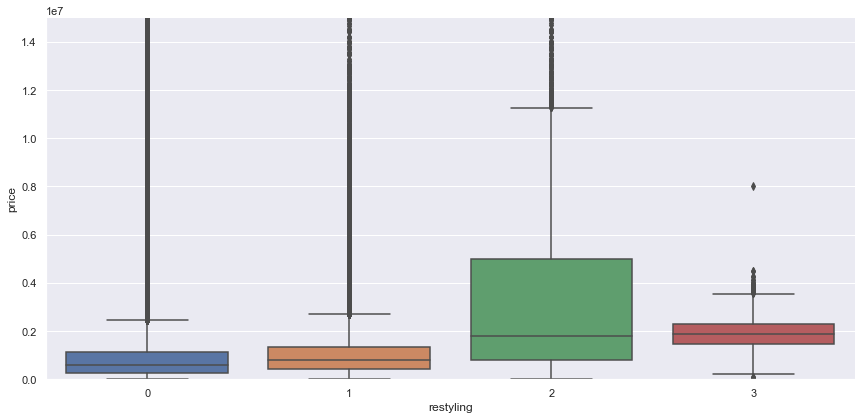

In [23]:
fig = sns.catplot(data=df_train[['restyling', 'price']], x="restyling", y="price", kind="box", height=6, aspect=2)
fig.set(ylim=(0, 1.5e7))

In [15]:
df_train['generation'].nunique(), df_train['generation_years'].nunique()

(334, 333)

#### summary
Выделив дополнительные данные из колонки generation нам удалось несколько уменьшить количество категорий - возможно это поможет в дальнейшем при обучении модели. При этом как видим количество уникальных значений generation и generation_years практически идентично - возможно это связано с тем, что годы выпуска каждого поколения фактически определяют и само поколение. В последующем необходимо будет проверить это.

### Modification

In [24]:
df_train['modification'].describe()

count               1424484
unique                 1795
top       2.0 AT (150 л.с.)
freq                  35232
Name: modification, dtype: object

In [25]:
df_train['modification'].unique()

array(['2.0 TDI DSG (150 л.с.)', '1.3 TCe 4WD CVT (150 л.с.)',
       'ML 320d 3.0 4MATIC 7G-Tronic (211 л.с.)', ...,
       'GL 450 4.7 4MATIC 7G-Tronic (340 л.с.)', '0.6 MT (29 л.с.)',
       '1.6 TDI MT (75 л.с.)'], dtype=object)

In [26]:
# Выделим из данной колонки объем двигателя, заполним образующиеся nan'ы данными из гугла

df_train['engine_volume'] = df_train.modification.str.extract(r'(?P<engine_volume>\d\.\d)')
df_train.loc[df_train['modification'] == 'FX30d 4WD AT (238 л.с.)', 'engine_volume'] = '3.0'
df_train.loc[df_train['modification'] == 'P85', 'engine_volume'] = '0.0'

In [27]:
df_train['engine_volume'].describe()

count     1424484
unique         49
top           1.6
freq       304770
Name: engine_volume, dtype: object

<AxesSubplot:xlabel='engine_volume', ylabel='Count'>

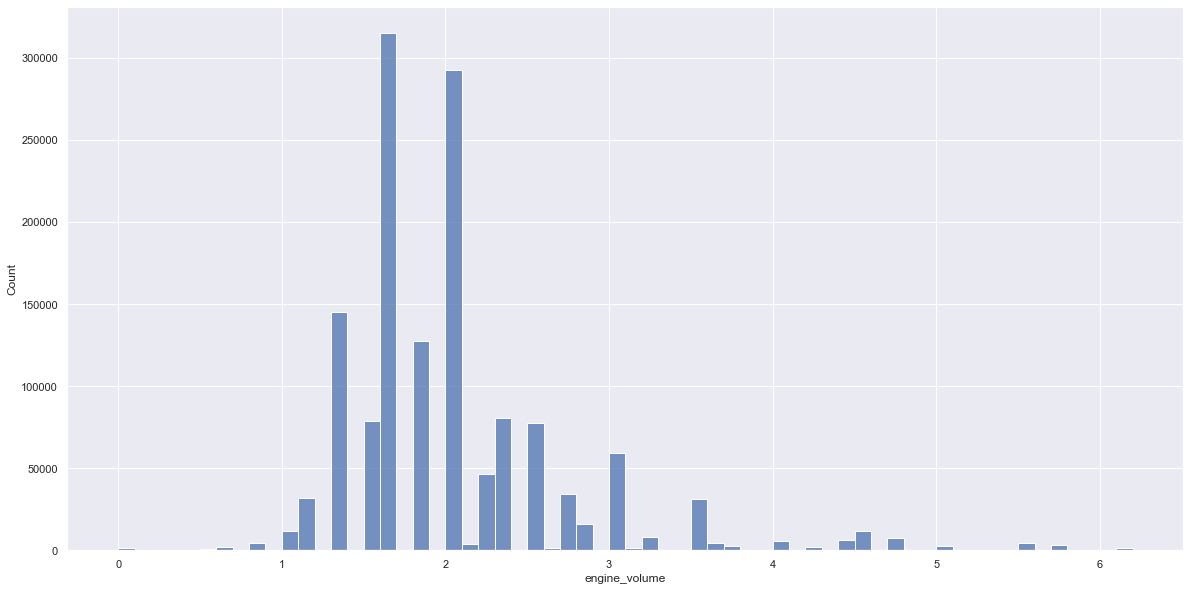

In [39]:
sns.histplot(data=df_train['engine_volume'].astype(float), binwidth=0.1)

In [37]:
# Выделим из данной колонки количество лошадиных сил, заполним образующиеся nan'ы данными из гугла

df_train['horse_power'] = df_train.modification.str.extract(r'(?P<horse_power>\(.*\))')
df_train['horse_power'] = df_train['horse_power'].str.strip('( л.с.)')
df_train['horse_power'] = df_train['horse_power'].fillna('382')
df_train['horse_power'] = df_train['horse_power'].astype(int)

<AxesSubplot:>

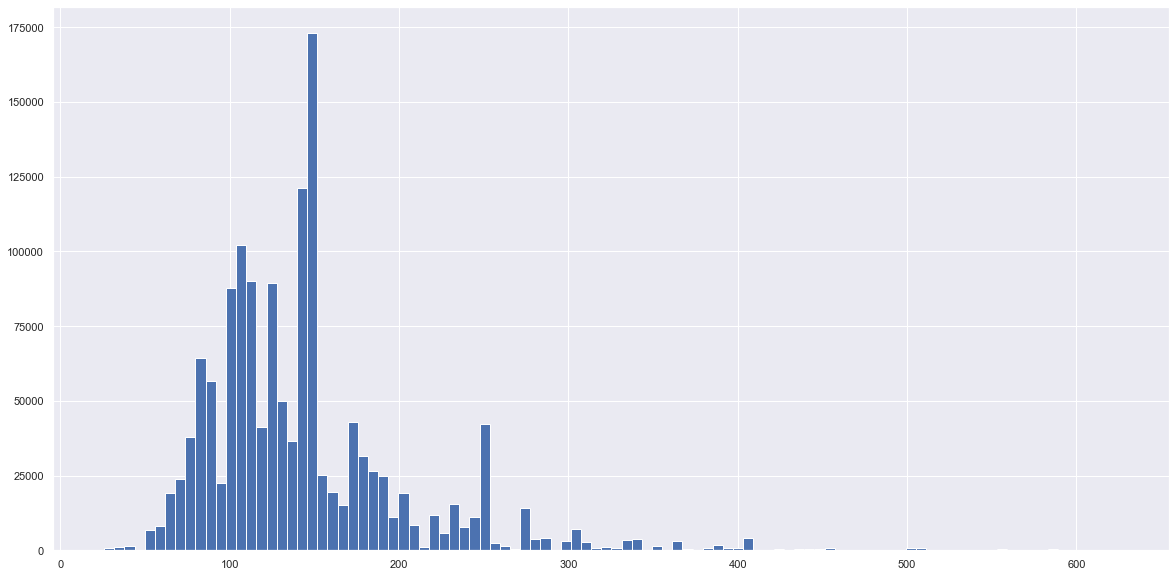

In [38]:
df_train['horse_power'].hist(bins=100)

#### summary

Выделив дополнительные колонки из modification мы получили дополнительные данные об объеме двигателя и его мощности. Остальная информация, содержащая по большей части данные о коробке передач, типе привода и тд будем считать избыточной и отбросим.

### Equipment

In [12]:
df_train['equipment'].describe()

count     1097413
unique       1102
top       Базовая
freq       509423
Name: equipment, dtype: object

In [14]:
df_train['equipment'].isna().sum()

327071

In [10]:
df_train['equipment'].unique()

array(['Highline', None, 'Conceptline', ..., 'Business + NAVI',
       'Red Sport', 'Dream III'], dtype=object)

In [20]:
df_train['equipment'].fillna('Базовая').str.split().apply(len).value_counts()

1    1320505
2      80939
3      19232
4       3138
5        555
6        112
7          3
Name: equipment, dtype: int64

In [53]:
df_train[df_train['equipment'].fillna('None').str.split().apply(len) == 1]['equipment'].unique()

array(['Highline', None, 'Conceptline', 'Trendline', 'Comfortline',
       'Life', 'Drive', 'Prime', 'Intense', 'Lifestyle', 'Prestige',
       'Family', 'S', 'Базовая', 'Sport', 'Royal', 'Base', 'Alltrack',
       'Exclusive', 'Active', 'Ambition', 'Standard', 'Comfort',
       'Touring', 'Luxury+', 'Superior', 'Premium+', 'Premium', 'Luxury',
       'Heritage', 'Сол', 'Executive', 'Excalibur', 'Elegance', 'TRD',
       'Luxe', 'Люкс', 'Комфорт', 'Intense+', 'Invite', 'Instyle', 'CC',
       'BL', 'DE', 'NAV', 'PC', 'S/AB', 'GLS', 'GT', 'Collection',
       'Dynamique', 'Optimum', 'Tendance', 'Original', 'Welcome',
       'Advantage', 'Престиж', 'Комфорт+', 'Standart', 'VX', 'VXR', 'GXR',
       'Cosmo', 'Classic', 'Vision', 'Style', 'Ultimate', 'Passion',
       'Proxy', 'Access', 'Allure', 'Confort', 'Comfort+', 'LE+', 'Tekna',
       'SE+', 'XE', 'LE', 'Travel', 'Start', 'Advanced', 'Active+',
       'Supreme', 'Expression', 'Privilege', 'Adventure', 'Lounge',
       'Feel', 'Live'

In [28]:
df_train[df_train['equipment'].fillna('None').str.split().apply(len) == 3]['equipment'].unique()

array(['Style TCe 150', 'Comfort RED Line', 'Comfort 2018 FWC',
       'Long, 5 Seats', 'Long, 4 Seats', 'Short, 5 Seats',
       'Intense+ (7 мест)', 'Avantgarde Особая серия',
       'Elegance Особая серия', 'Urban Night Edition',
       'Dakar Black Edition', 'Hockey Edition Outdoor',
       'BlueEFFICIENCY AT Classic', 'Elegance + Navi', 'Style + Navi',
       'Cooper S ALL4', 'Prestige + Pano', 'Luxe 7 мест', 'Luxe 5 мест',
       'Optima Air conditioner', 'M Sport Pro', 'Style + Multimedia',
       'M Sport Plus', 'M Sport Edition', 'GTI "Edition 35"',
       'Sport Особая серия', 'N Line High-Tech', 'N Line Dynamic',
       'Premium 5 мест', 'Luxury 5 мест', 'Elite 7 мест',
       'Premium 7 мест', 'Elite 5 мест', 'Luxury 7 мест',
       'Executive 5 мест', 'Executive 7 мест', 'M Sport Pure',
       'JLX-E SE Exclusive', 'M Sport X', 'Travel Limited Edition',
       'LTZ 5 мест', 'Style + Navigation', 'Black&Brown + Winter',
       'X Adventure XC', 'White and Black', 'SE TOP N-

In [30]:
df_train[df_train['equipment'].fillna('None').str.split().apply(len) == 5]['equipment'].unique()

array(['Advance 35 TFSI S tronic', 'Design 35 TFSI S tronic',
       'Family + Style + High-Tech', 'Comfort 7 мест Multimedia Winter',
       'Comfort 5 мест Multimedia Winter',
       'Специальная серия «Cosmos» (7 мест)',
       'Специальная серия «Cosmos» (8 мест)'], dtype=object)

In [33]:
df_train[df_train['equipment'].fillna('None').str.split().apply(len) == 7]['price']

305165    3300000.0
305170    3400000.0
305203    3910000.0
Name: price, dtype: float64

Как видно, большое количество уникальных значений усложняет работу с ними, при этом часть информации, зашифрованной в строке дублирует уже существующую:
'Люкс Премиум Автомат', 'GLE 53 4MATIC+', 'Top Prestige (2015-2016)'

In [44]:
# Посмотрим, можно ли выделить информацию о количестве мест
(df_train.equipment.str.extract(r'(?P<equipment>[0-9]?\sмест)').notna().sum(), 
df_train.equipment.str.extract(r'(?P<equipment>[0-9]?\sseats)').notna().sum())

(equipment    3168
 dtype: int64,
 equipment    137
 dtype: int64)

In [48]:
# Посмотрим на количество записей с упоминанием о локальной сборке

df_train.equipment.str.extract(r'(?P<equipment>Локальная сборка)').notna().sum()

equipment    1136
dtype: int64

#### summary

Очень большое количество категорий. 
Возможные пути улучшения качества данной колонки:
* Убрать опечатки: есть категории "Luxary" и "Confort", "Standart" т.д.
* Убрать синонимы, как внутри англоязычных и русскоязычных строк: "Basic" и "Base", "Lux" и "Luxe", так и между разными языками - "Lux" и "Люкс", "Premium" и "Премиум" и тд
* Обрабатывать данную колонку как мультилейбл - возможно преобразование типа mean-target encoding с учетом мультилейблов даст модели лучшее представление о влиянии этой колонки на таргет:
"Family + Style + High-Tech" можно представить как три лейбла - "Family", "Style" и "High-Tech"

### Description

In [54]:
df_train['description'].describe()

count                     1422915
unique                    1332870
top       Все вопросы по телефону
freq                         2938
Name: description, dtype: object

In [31]:
df_train['description'].value_counts()[-1000:-200]

Продаю камри от собственника . Кузов в заводском окрасе, не битая.\nНа  авто установлен газ, вписан в ПТС \nТребуется заменить натяжитель цепи, и свечи в коллекторе. \nБез торга и обмена!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  1
Срочно один день цена,Не Битая Не крашенная.Полная комплектация кондиционер работает морозит+Метан ГБО, всё в идеальном состоянии мотор коробка, электро всё работает, Юрид чисто.                       

#### summary

Очень большое количество категорий, много вариантов обработки. 
Возможные пути обработки текстов описаний:
* Убрать самые частые как неинформативные - "Торг", "Все вопросы по телефону", "." и т.д.
* Судя по описаниям - объявления с очень подробным и одинаковым описанием написаны от дилерских центров или перекупов. Возможно имеет смысл выделить в отдельную колонку информацию об этом.
* Получение эмбеддингов описаний: tf-idf, word2vec c, например, последующией кластеризацией.

### Audiosystem

In [20]:
df_train['audiosistema'].describe()

count    446913.000000
mean      13775.747063
std           0.875856
min       13774.000000
25%       13775.000000
50%       13776.000000
75%       13776.000000
max       13777.000000
Name: audiosistema, dtype: float64

In [21]:
mask = {str(i): options[options['id'] == i].viewItemLabel.values[0] for i in df_train['audiosistema'].dropna().unique()}
mask['nan'] = 'Нет аудиосистемы'

In [22]:
mask

{'13777.0': '8+ колонок',
 '13776.0': '6 колонок',
 '13775.0': '4 колонки',
 '13774.0': '2 колонки',
 'nan': 'Нет аудиосистемы'}

In [23]:
df_train['audiosistema'] = df_train['audiosistema'].apply(lambda x: mask[str(x)])

In [24]:
df_train['audiosistema'].value_counts()

Нет аудиосистемы    977571
4 колонки           160659
6 колонок           157060
8+ колонок          102002
2 колонки            27192
Name: audiosistema, dtype: int64

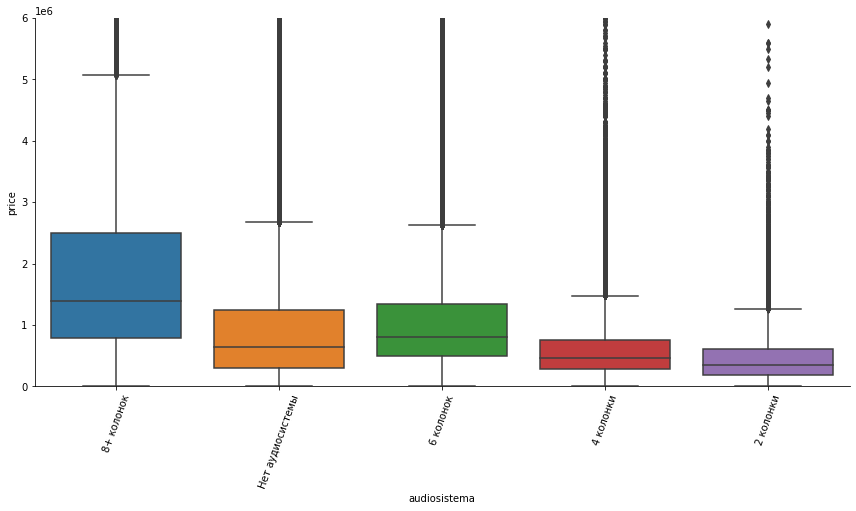

In [25]:
fig = sns.catplot(data=df_train[['audiosistema', 'price']], x="audiosistema", y="price", kind="box", height=6, aspect=2)
plt.xticks(rotation=70)
fig.set(ylim=(0, 0.6e7))

#### summary

Категория довольно сильно связана с таргетом - распределения довольно сильно отличаются в зависимости от наличия и типа аудиосистемы.

### Wheels
####  discs

In [9]:
df_train['diski'].describe()

count    605984.000000
mean      13795.480234
std           1.661153
min       13786.000000
25%       13794.000000
50%       13795.000000
75%       13796.000000
max       13809.000000
Name: diski, dtype: float64

In [10]:
mask = {str(i): int(options[options['id'] == i].viewItemLabel.values[0][:-1]) for i in df_train['diski'].dropna().unique()}
mask['nan'] = -1

In [11]:
mask

{'13796.0': 17,
 '13797.0': 18,
 '13795.0': 16,
 '13798.0': 19,
 '13800.0': 21,
 '13799.0': 20,
 '13801.0': 22,
 '13803.0': 24,
 '13793.0': 14,
 '13794.0': 15,
 '13792.0': 13,
 '13802.0': 23,
 '13806.0': 27,
 '13809.0': 30,
 '13790.0': 11,
 '13789.0': 10,
 '13786.0': 7,
 '13804.0': 25,
 '13787.0': 8,
 '13805.0': 26,
 '13791.0': 12,
 '13788.0': 9,
 '13807.0': 28,
 '13808.0': 29,
 'nan': -1}

In [12]:
df_train['diski'] = df_train['diski'].apply(lambda x: mask[str(x)])

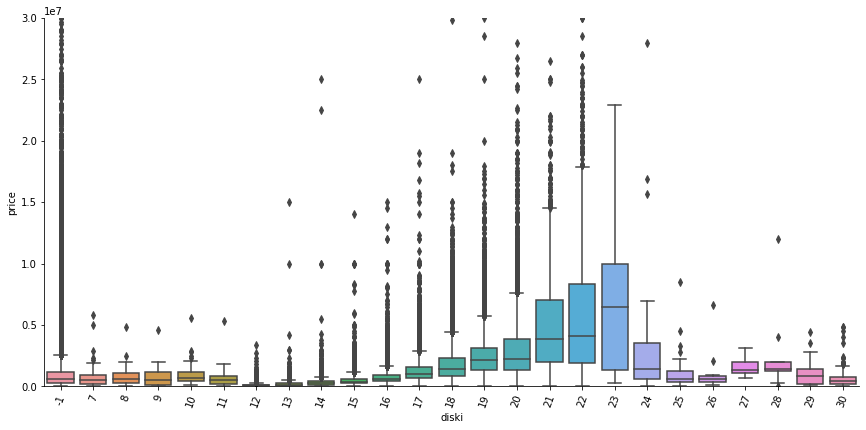

In [13]:
fig = sns.catplot(data=df_train[['diski', 'price']], x="diski", y="price", kind="box", height=6, aspect=2)
plt.xticks(rotation=70)
fig.set(ylim=(0, 3e7))
plt.show()

In [15]:
df_train['diski'].value_counts()

-1     818500
 16    176924
 17    129135
 15    103437
 18     76016
 14     43319
 19     32515
 20     21055
 13     12215
 21      7209
 22      3164
 12       368
 30       161
 8         98
 7         94
 10        68
 23        41
 24        41
 25        28
 9         28
 11        26
 29        14
 26        11
 28         9
 27         8
Name: diski, dtype: int64

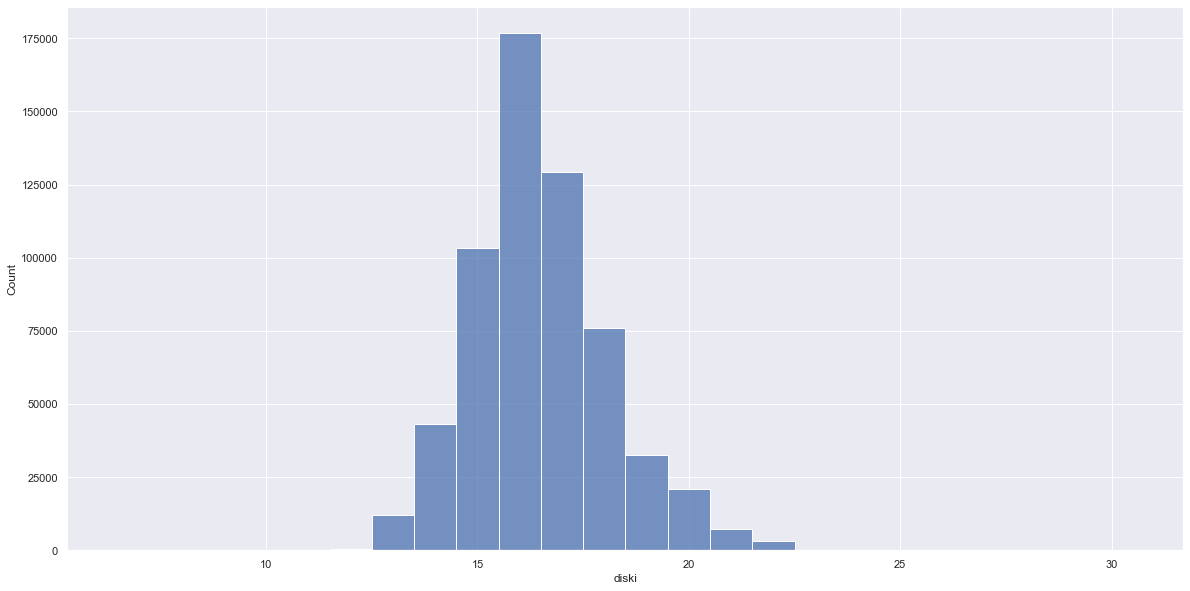

In [21]:
# Построим гистрограмму без неизвестных значений
fig = sns.histplot(data=df_train[df_train['diski'] != -1]['diski'], discrete=True)

#### Summary

Больше половины всех значений - пропуски, при этом там, где мы знаем о величине дисков видно, что есть взаимосвязь с таргетом.
Возможно будет иметь смысл размечать пропуски, например модой по данной модели автомобиля.

### Power windows
#### electropodemniki

In [23]:
df_train['electropodemniki'].describe()

count    809911.000000
mean      13727.806817
std           0.394796
min       13727.000000
25%       13728.000000
50%       13728.000000
75%       13728.000000
max       13728.000000
Name: electropodemniki, dtype: float64

In [27]:
df_train['electropodemniki'].value_counts()

13728.0    653450
13727.0    156461
Name: electropodemniki, dtype: int64

In [28]:
mask = {str(i): options[options['id'] == i].viewItemLabel.values[0] for i in df_train['electropodemniki'].dropna().unique()}
mask['nan'] = 'Нет данных'

In [29]:
mask

{'13728.0': 'Передние и задние',
 '13727.0': 'Только передние',
 'nan': 'Нет данных'}

In [30]:
df_train['electropodemniki'] = df_train['electropodemniki'].apply(lambda x: mask[str(x)])

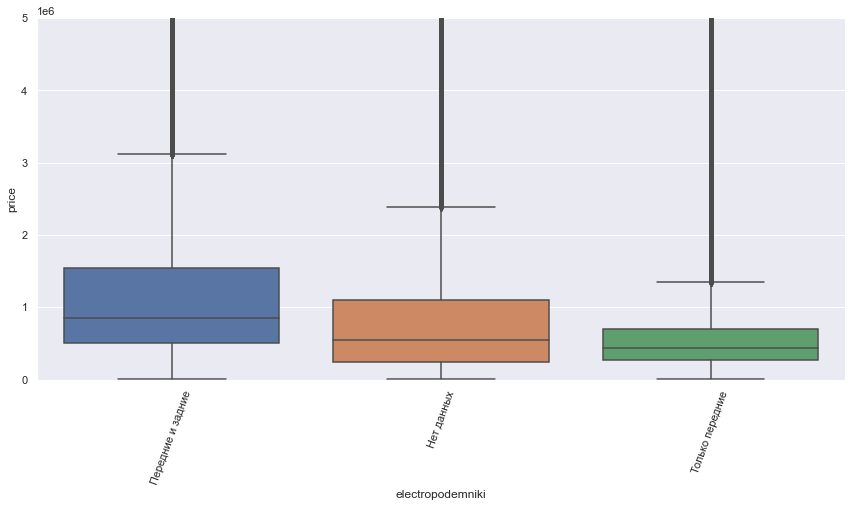

In [32]:
fig = sns.catplot(data=df_train[['electropodemniki', 'price']], x="electropodemniki", y="price", kind="box", height=6, aspect=2)
plt.xticks(rotation=70)
fig.set(ylim=(0, 0.5e7))
plt.show()

#### Summary

Почти половина значений - пропуски, при этом видно что распределения у категорий "передние и задние" и "только передние" заметно отличаются.
Для разметки отсутствующих данных, возможно, поможет размечать модой по аналогичным моделям с аналогичной комплектацией

### Lights
####  fary

In [33]:
df_train['fary'].describe()

count    446581.000000
mean      13780.758447
std           0.798808
min       13780.000000
25%       13780.000000
50%       13781.000000
75%       13781.000000
max       13782.000000
Name: fary, dtype: float64

In [34]:
df_train['fary'].value_counts()

13780.0    209445
13781.0    135564
13782.0    101572
Name: fary, dtype: int64

In [35]:
mask = {str(i): options[options['id'] == i].viewItemLabel.values[0] for i in df_train['fary'].dropna().unique()}
mask['nan'] = 'Нет данных'
mask

{'13780.0': 'Галогенные',
 '13782.0': 'Светодиодные',
 '13781.0': 'Ксеноновые',
 'nan': 'Нет данных'}

In [37]:
df_train['fary'] = df_train['fary'].apply(lambda x: mask[str(x)])

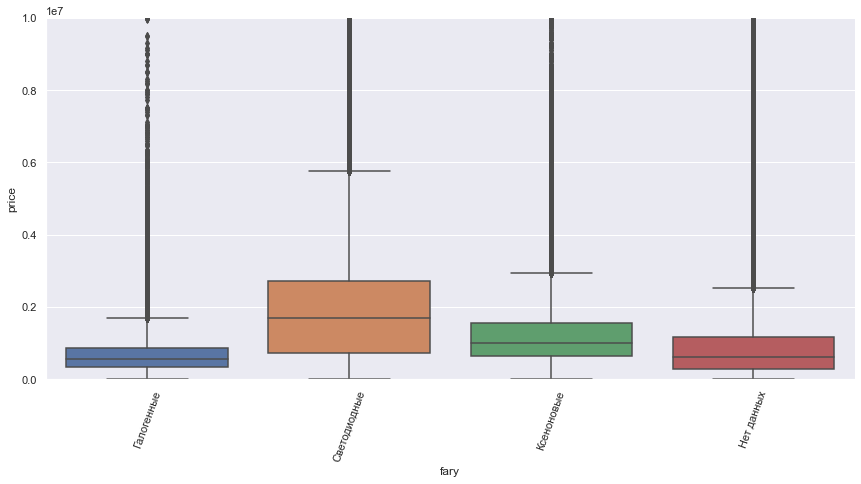

In [39]:
fig = sns.catplot(data=df_train[['fary', 'price']], x="fary", y="price", kind="box", height=6, aspect=2)
plt.xticks(rotation=70)
fig.set(ylim=(0, 1e7))
plt.show()

#### Summary

Аналогично предыдущим колонкам, данная имеет 2/3 пропусков. Возможно поможет разметка модой по аналогичным моделям и комплектации.

### Climate control
#### upravlenie_klimatom

In [40]:
df_train['upravlenie_klimatom'].describe()

count    797670.000000
mean      13710.062752
std           0.882270
min       13709.000000
25%       13709.000000
50%       13710.000000
75%       13711.000000
max       13711.000000
Name: upravlenie_klimatom, dtype: float64

In [41]:
df_train['upravlenie_klimatom'].value_counts()

13711.0    337051
13709.0    286996
13710.0    173623
Name: upravlenie_klimatom, dtype: int64

In [42]:
mask = {str(i): options[options['id'] == i].viewItemLabel.values[0] for i in df_train['upravlenie_klimatom'].dropna().unique()}
mask['nan'] = 'Нет данных'
mask

{'13711.0': 'Климат-контроль многозонный',
 '13710.0': 'Климат-контроль однозонный',
 '13709.0': 'Кондиционер',
 'nan': 'Нет данных'}

In [43]:
df_train['upravlenie_klimatom'] = df_train['upravlenie_klimatom'].apply(lambda x: mask[str(x)])

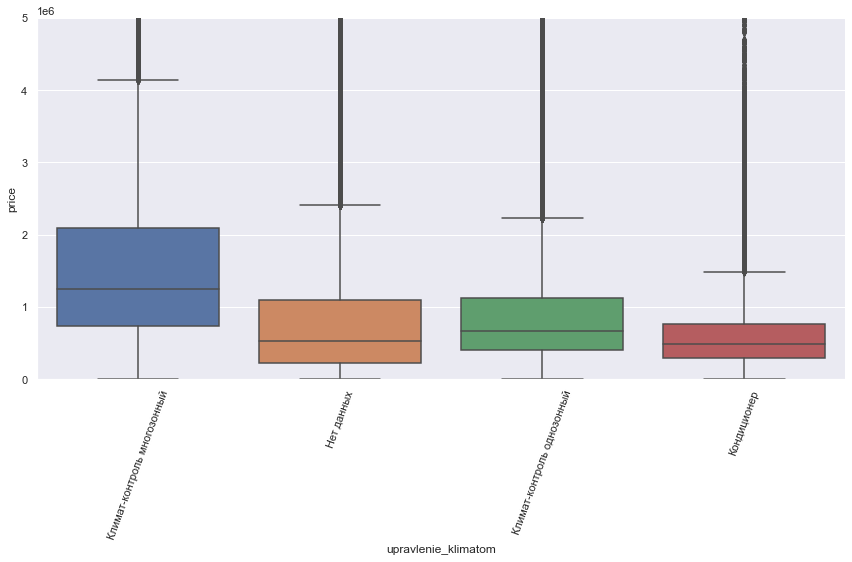

In [45]:
fig = sns.catplot(data=df_train[['upravlenie_klimatom', 'price']], x="upravlenie_klimatom", y="price", kind="box", height=6, aspect=2)
plt.xticks(rotation=70)
fig.set(ylim=(0, 0.5e7))
plt.show()

### Summary

Аналогично предыдущим колонкам, данная имеет 2/3 пропусков. Возможно поможет разметка модой по аналогичным моделям и комплектации, а также парсинг description.

### Power steering
#### usilitel_rul 

In [46]:
df_train['usilitel_rul'].describe()

count    748316.000000
mean      13705.576199
std           0.867156
min       13705.000000
25%       13705.000000
50%       13705.000000
75%       13707.000000
max       13707.000000
Name: usilitel_rul, dtype: float64

In [47]:
df_train['usilitel_rul'].value_counts()

13705.0    507121
13707.0    189984
13706.0     51211
Name: usilitel_rul, dtype: int64

In [48]:
mask = {str(i): options[options['id'] == i].viewItemLabel.values[0] for i in df_train['usilitel_rul'].dropna().unique()}
mask['nan'] = 'Нет данных'
mask

{'13707.0': 'Электрический',
 '13706.0': 'Электрогидравлический',
 '13705.0': 'Гидравлический',
 'nan': 'Нет данных'}

In [50]:
df_train['usilitel_rul'] = df_train['usilitel_rul'].apply(lambda x: mask[str(x)])

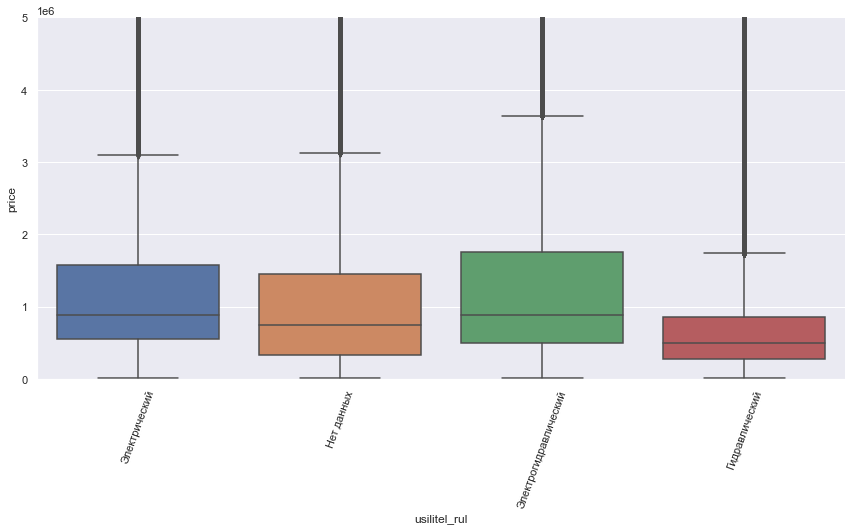

In [51]:
fig = sns.catplot(data=df_train[['usilitel_rul', 'price']], x="usilitel_rul", y="price", kind="box", height=6, aspect=2)
plt.xticks(rotation=70)
fig.set(ylim=(0, 0.5e7))
plt.show()

#### Summary

Аналогично предыдущим колонкам, данная имеет половину пропусков. Возможно поможет разметка модой по аналогичным моделям и комплектации.
Дополнительно можно попробовать парсить description, модель и equipment по запросам EHPS, HPS, EPS.

### Audiosystem mult
#### audiosistema_mult

In [9]:
df_train['audiosistema_mult'].describe()

count       92906
unique          1
top       [13778]
freq        92906
Name: audiosistema_mult, dtype: object

In [10]:
df_train['audiosistema_mult'].value_counts()

[13778]    92906
Name: audiosistema_mult, dtype: int64

In [11]:
mask = {str(i): options[options['id'] == float(i.strip('[]'))].viewItemLabel.values[0] for i in df_train['audiosistema_mult'].dropna().unique()}
mask['None'] = 'Нет данных'
mask

{'[13778]': 'Сабвуфер', 'None': 'Нет данных'}

In [12]:
df_train['audiosistema_mult'] = df_train['audiosistema_mult'].apply(lambda x: mask[str(x)])

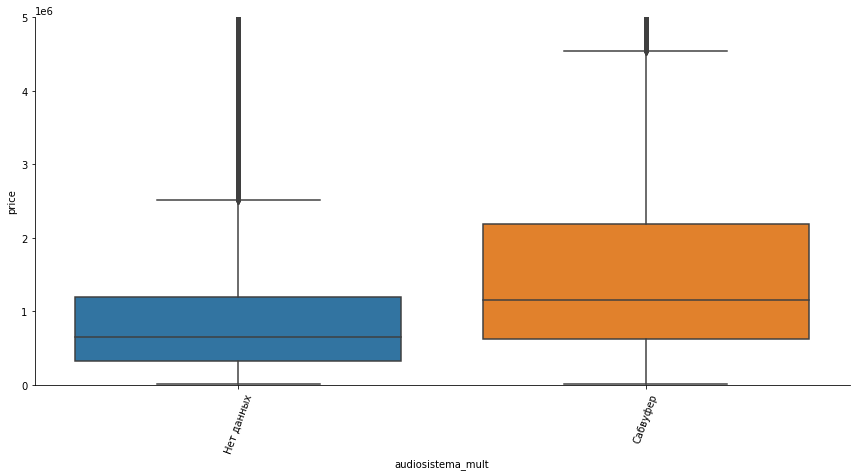

In [13]:
fig = sns.catplot(data=df_train[['audiosistema_mult', 'price']], x="audiosistema_mult", y="price", kind="box", height=6, aspect=2)
plt.xticks(rotation=70)
fig.set(ylim=(0, 0.5e7))
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

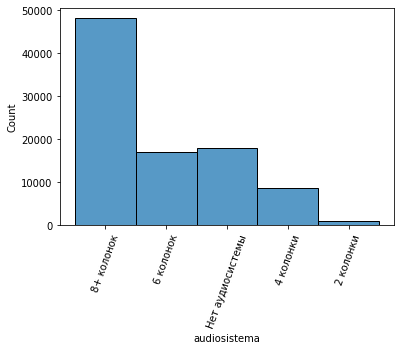

In [29]:
# Посмотрим пересечение - какое количество колонок аудиосистемы у автомобилей с сабвуфером
sns.histplot(data=df_train[df_train['audiosistema_mult'] == 'Сабвуфер']['audiosistema'])
plt.xticks(rotation=70)

In [28]:
df_train[df_train['audiosistema_mult'] == 'Сабвуфер']['audiosistema'].value_counts()

8+ колонок          48108
Нет аудиосистемы    17985
6 колонок           17106
4 колонки            8763
2 колонки             944
Name: audiosistema, dtype: int64

#### Summary

Таким образом, данная колонка - по сути бинарный категориальный признак наличия сабвуфера в автомобильной аудиосистеме.
Пропущенные значения можно попытаться спарсить из description.

### Tares and wheels mult
#### shini_i_diski_mult

In [29]:
df_train['shini_i_diski_mult'].describe()

count      376941
unique          1
top       [13810]
freq       376941
Name: shini_i_diski_mult, dtype: object

In [33]:
mask = {str(i): options[options['id'] == float(i.strip('[]'))].viewItemLabel.values[0] for i in df_train['shini_i_diski_mult'].dropna().unique()}
mask['None'] = 'Нет данных'
mask

{'[13810]': 'Зимние шины в комплекте', 'None': 'Нет данных'}

In [35]:
df_train['shini_i_diski_mult'] = df_train['shini_i_diski_mult'].apply(lambda x: mask[str(x)])

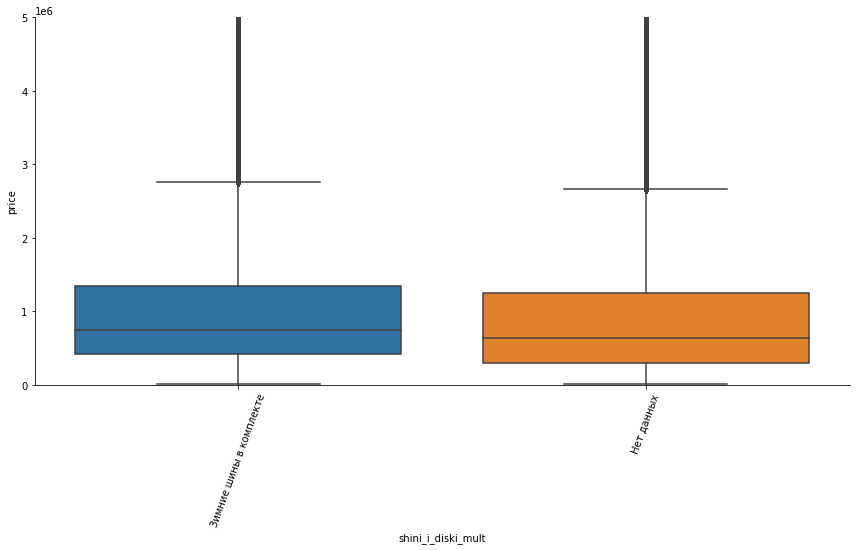

In [36]:
fig = sns.catplot(data=df_train[['shini_i_diski_mult', 'price']], x="shini_i_diski_mult", y="price", kind="box", height=6, aspect=2)
plt.xticks(rotation=70)
fig.set(ylim=(0, 0.5e7))
plt.show()

#### Summary

Данная колонка так же является бинарным категориальным признаком наличия зимных шин в комплекте.
Пропущенные значения можно попробывать парсить из description.